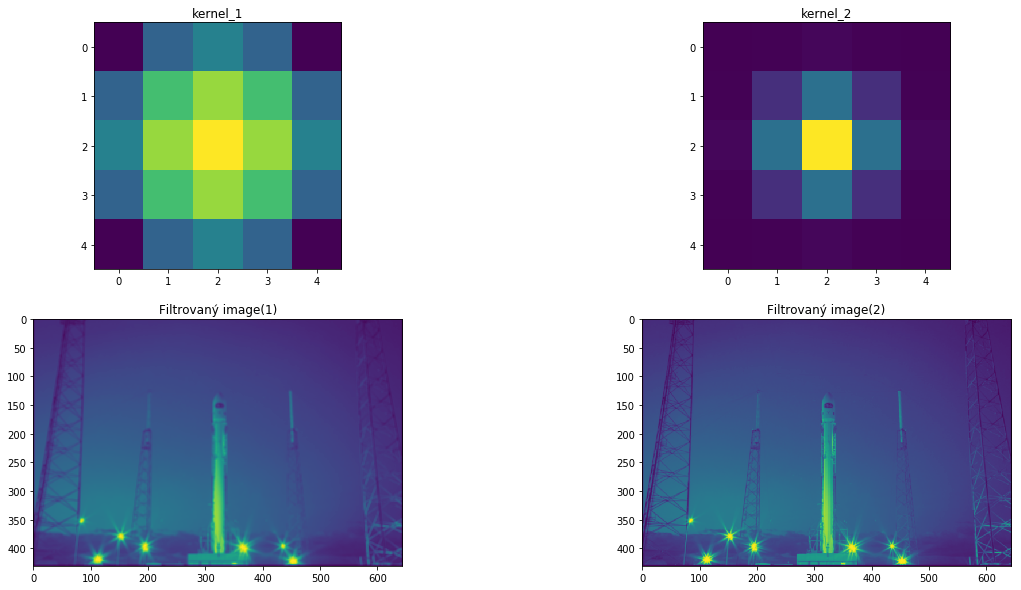

In [6]:
import numpy as np
from scipy import signal
from skimage import data
from skimage.color import rgb2gray
import matplotlib.pyplot as plt

const = 2
img_original = data.rocket()
img = rgb2gray(img_original)

sigmas = [np.sqrt(const)/const, 1, np.sqrt(const), const, const*np.sqrt(const), const*const]

kernel_1 = np.outer(signal.gaussian(5, sigmas[4]), signal.gaussian(5, sigmas[4]))
kernel_2 = np.outer(signal.gaussian(5, sigmas[0]), signal.gaussian(5, sigmas[0]))

kernel_1 = kernel_1 / np.sum(kernel_1)
kernel_2 = kernel_2 / np.sum(kernel_2)

gauss_filt_img = signal.convolve2d(img, kernel_1)
gauss_filt_img2 = signal.convolve2d(img, kernel_2)

plt.figure(figsize =(20,10))
plt.subplot(221)
plt.imshow(kernel_1)
plt.title("kernel_1")
plt.subplot(222)
plt.imshow(kernel_2)
plt.title("kernel_2")
plt.subplot(223)
plt.imshow(gauss_filt_img)
plt.title("Filtrovaný image(1)")
plt.subplot(224)
plt.imshow(gauss_filt_img2)
plt.title("Filtrovaný image(2)")
plt.show()

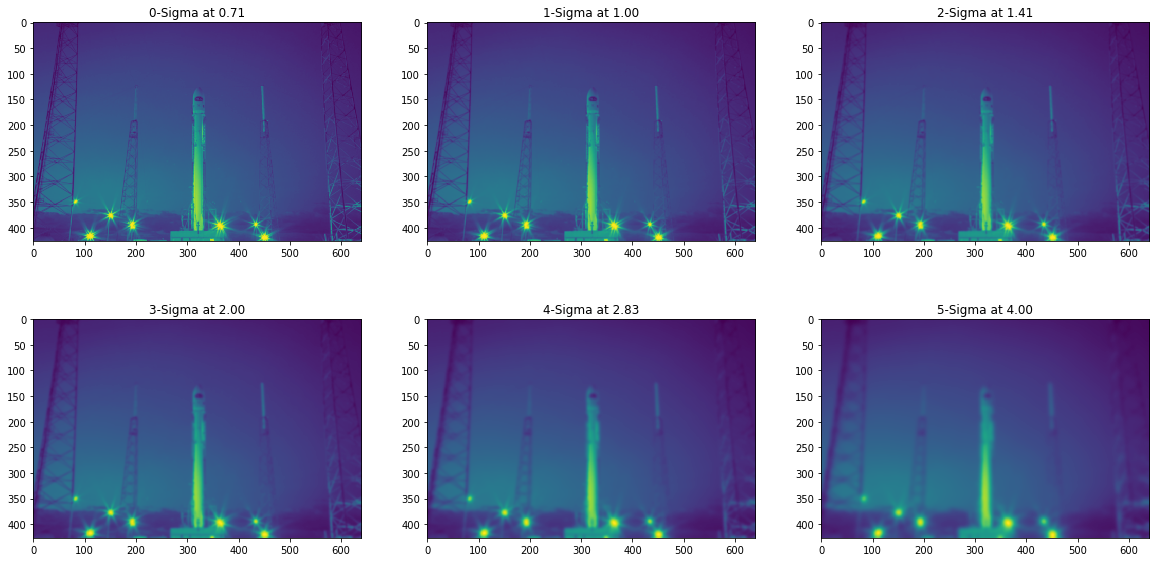

In [7]:
from scipy.ndimage import gaussian_filter

image_blured = np.zeros(shape=(img.shape[0],img.shape[1],len(sigmas)))

for i, sigma in zip(range(len(sigmas)),sigmas):
    image_blured[:,:,i] = gaussian_filter(img, sigma)
    
fig, axs = plt.subplots(2,3,figsize=(20,10))
for i in range(len(sigmas)):
    axs[i//3, i%3].imshow(image_blured[:,:,i])
    axs[i//3, i%3].set_title("{}-Sigma at {:.2f}".format(i, sigmas[i]))
    

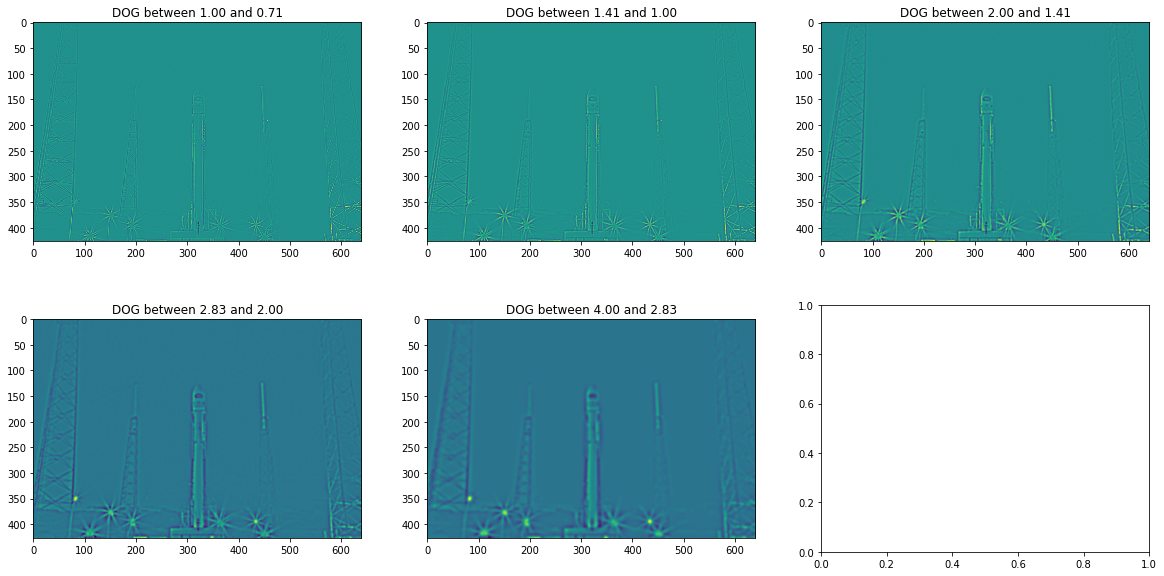

In [8]:
diff = np.zeros(shape=(img.shape[0], img.shape[1], len(sigmas)-1))

for i in range(len(sigmas)-1):
    diff[:,:,i] = image_blured[:,:,i]-image_blured[:,:,i+1]
    
fig, axs = plt.subplots(2,3,figsize =(20,10))
for i in range(len(sigmas)-1):
     axs[i//3, i%3].imshow(diff[:,:,i])
     axs[i//3, i%3].set_title("DOG between {:.2f} and {:.2f}".format(sigmas[i+1], sigmas[i]))

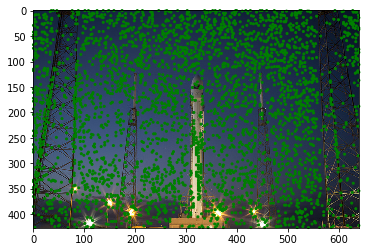

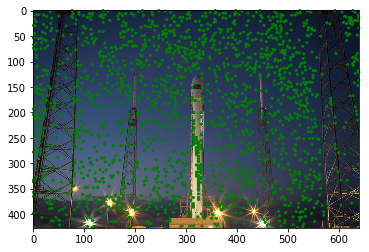

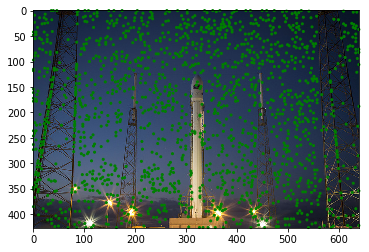

In [10]:
from scipy.ndimage import maximum_filter, minimum_filter
dog_max = maximum_filter(diff, (3,3,3))
dog_min = minimum_filter(diff, (3,3,3))

local_max = diff==dog_max
local_min = diff==dog_min

keypoints = np.logical_or(np.sum(local_max[:,:,1:2], axis=2)>0,np.sum(local_min[:,:,1:2], axis=2)>0)
keypoints_max = np.sum(local_max[:,:,1:2], axis=2)>0
keypoints_min = np.sum(local_min[:,:,1:2], axis=2)>0

plt.figure(figsize =(10,10))
fig, ax = plt.subplots()

rr, cc = np.where(keypoints)
ax.imshow(img_original)
for r,c in zip(rr,cc):
    circle1 = plt.Circle((c,r), 2, color='g', clip_on=False)
    ax.add_patch(circle1)

plt.figure(figsize =(10,10))
fig, ax = plt.subplots()

rr, cc = np.where(keypoints_max)
ax.imshow(img_original)
for r,c in zip(rr,cc):
    circle1 = plt.Circle((c,r), 2, color='g', clip_on=False)
    ax.add_patch(circle1)
  
plt.figure(figsize =(10,10))
fig, ax = plt.subplots()
    
rr, cc = np.where(keypoints_min)
ax.imshow(img_original)
for r,c in zip(rr,cc):
    circle1 = plt.Circle((c,r), 2, color='g', clip_on=False)
    ax.add_patch(circle1)